## In this notebook, we benchmark two methods of computing $k$ nearest neighbors. 

## The first method (green curves) maintains a maximum value of $\tau$ the maximum distance from the $k$ neighbors for a given point, and narrows the value as points are found (the usual method for finding $k$ nearest points on a VP tree). 

## The second method (red curves) recycles information about the $\tau$ by moving along in a path. Once the $\tau$ has been found for a particular point $x$, the next point $y$ for which neighbors are found is the closest unvisited neighbor of $x$. This way, the triangle inequality can be used to get an upper bound for $\tau$ at $y$. If no such points exist, an unvisited point is picked at random and $\tau$ resets.

https://github.com/tabakg/vp_trees_cpp

In [1]:
import vp_trees_cpp.vp_tree as vp_tree
import time
import numpy as np
from numpy.random import normal
import random
import pprint
pp = pprint.PrettyPrinter(indent=4)

In [2]:
%matplotlib inline

import matplotlib as plt
import matplotlib.pyplot as plt


In [3]:
mu = 0.0
sigma = 1.0

In [4]:
D = {}

In [5]:
dims = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,50,100]
data_sizes = [1000,2000,3000]## [100,200,300,400,500,600,700,800,900,1000,1250,1500,1750,2000,3000,5000,10000]
NNs = [10,25,50,100,200,500]

In [6]:
## make a dictionary to store the times the two different algorithms take. 
## The keys of the dictionary are the dimension of the data, the number of data points, 
## and $k$, the number of nearest neighbors the algorithm is finding.

for dim in dims:
    for data_size in data_sizes:
        for NN in NNs:
            data = np.reshape(np.array([random.normalvariate(mu,sigma) for i in range(data_size*dim)]),(data_size,dim) ).tolist()
            t0 = time.time()
            tree = vp_tree.tree_container(data)
            t1 = time.time()
            nearest_neighbrs =[None]*(len(data))
            for i,point in enumerate(data):
                nearest_neighbrs[i] = (tree.find_N_neighbors(point,NN))
            t2 = time.time()
            neighborhoods = tree.find_all_N_neighbors(NN);
            t3 = time.time()            
            D[dim,data_size,NN] = (t1-t0,t2-t1,t3-t2,neighborhoods == nearest_neighbrs)

In [7]:
##  Check the outputs are identical for both algorithms being compared

all([D[key] [-1] for key in D])

True

In [8]:
# ### plot as a function of data sizes for each dim and NN
# for dim in dims:
#     for NN in NNs:
#         plt.plot(data_sizes,map(lambda z :D[dim,z,NN][1:3],data_sizes))
#         plt.legend(handles=[line_up, line_down])
#         plt.show()

In [9]:
# ### plot as a function of NN for each data_size and dim
# for dim in dims:
#     for data_size in data_sizes:
#         plt.plot(NNs,map(lambda z : D[dim,data_size,z][1:3],NNs))
#         plt.title("dim = " + str(dim)+ "; data_size = " + str(data_size))
#         plt.xlabel("Number of nearest neighbors")
#         plt.ylabel("Time")
#         plt.show()

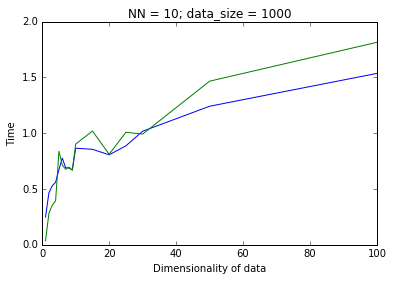

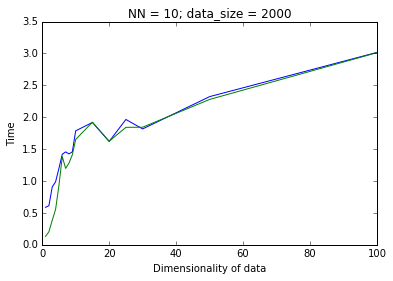

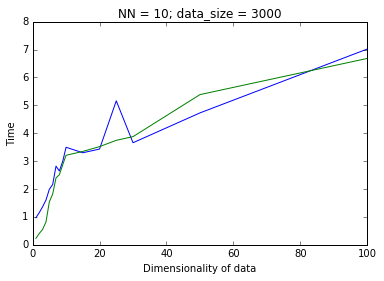

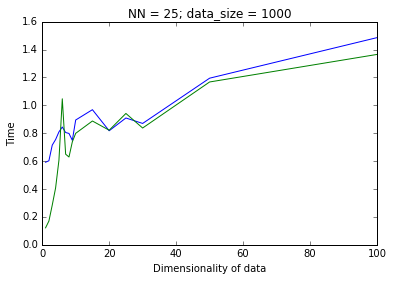

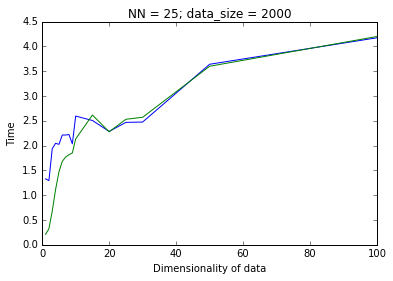

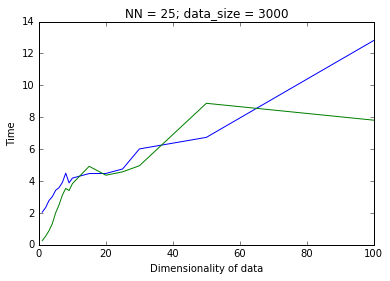

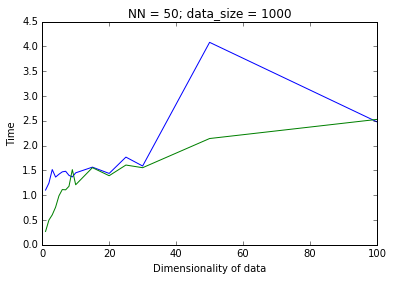

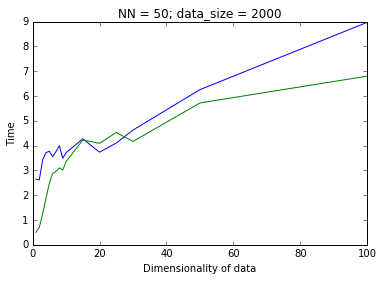

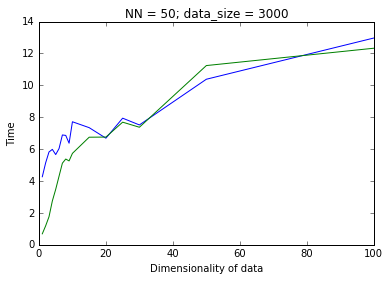

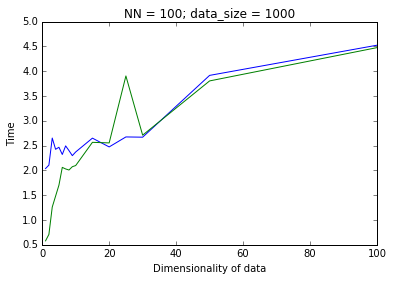

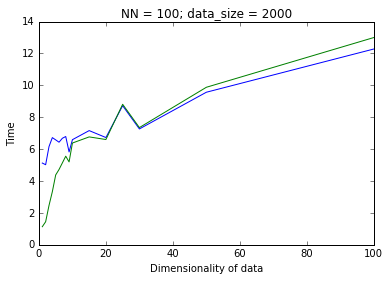

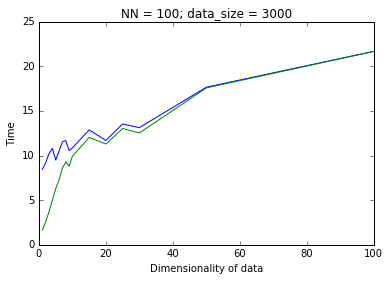

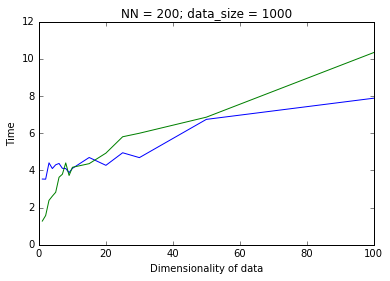

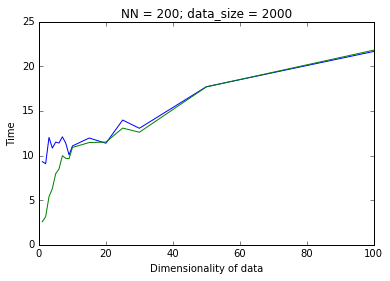

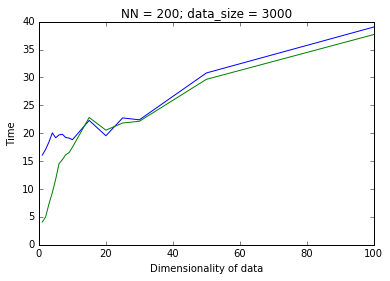

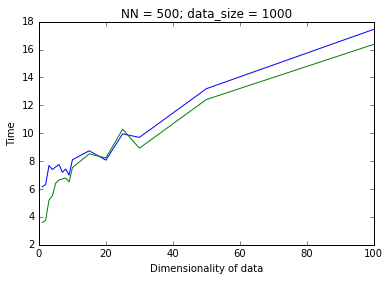

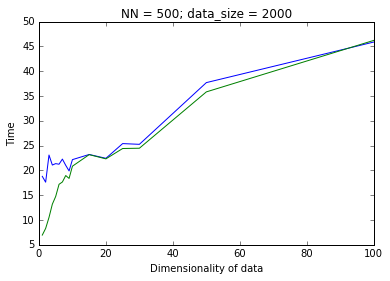

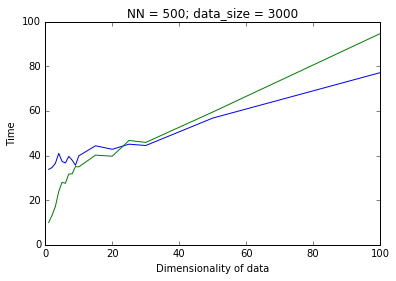

In [10]:
### plot as a function of dim for each data_size and NN
for NN in NNs:
    for data_size in data_sizes:
        plt.plot(dims,map(lambda z :D[z,data_size,NN][1:3],dims))
        plt.title("NN = " + str(NN)+ "; data_size = " + str(data_size))
        plt.xlabel("Dimensionality of data")
        plt.ylabel("Time")
        plt.show()

## Conclusions

Here we compare two k-nearest neighbors finding methods. The first looks for the nearest $k$ neighbors for each node. The second method finds all the nearest neighbors at once. To do this, the algorithm tags each node. After a neighborhood of a node is found, the nearest untagged node in the neighborhood is set to be the next node examined. If all the nodes in the neighborhood are tagged, an arbitrary untagged point is picked. In this way, the maximum distance to examine for each neighborhood can be made consistently small using the triangle inequality to upper bound its radius.

Examining the diagrams above, we see the most savings of the heuristic occur when the dimensionality is small and desired $k$ is relatively larger. This pattern is persistent for different data sizes.